In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ztfquery import sedm, io
from pymage import panstarrs
import pysedm
from ztfquery import sedm
import matplotlib
import numpy as np
from IPython.core.display import display, HTML
from pymage import panstarrs 

display(HTML("<style>.container { width:100% !important; }</style>"))
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi = False


# Get image from PS1 

In [5]:
ra,dec = 11.179, 46.747
p=panstarrs.PS1Target.from_coord(ra,dec)

In [6]:
p.download_catalog
p.download_extended_catalog()
p.download_cutout(load_weight=True)

Created TAP+ (v1.2.1) - Connection:
	Host: vao.stsci.edu
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]
downloading BytesIO
downloading BytesIO


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


downloading BytesIO
downloading BytesIO


downloading BytesIO
downloading BytesIO


downloading BytesIO
downloading BytesIO


downloading BytesIO
downloading BytesIO


## Image in each band

In [7]:
rfilter = p.imgcutout["r"]
gfilter = p.imgcutout["g"]
ifilter = p.imgcutout["i"]
zfilter = p.imgcutout["z"]
yfilter = p.imgcutout["y"]

### Data (count --> flux)

In [118]:
rfilter.data  ##count units

array([[ 3.09758615e-02, -8.43126488e-02,  1.02688456e-01, ...,
        -5.61554670e-02,  2.98174429e-02,  6.43748665e-02],
       [ 1.47920501e-02, -5.64235544e-02, -4.40898657e-02, ...,
         4.19543982e-02, -1.71481884e-02,  2.76597691e-02],
       [-1.04788423e-02,  7.20168829e-02, -6.27126503e-02, ...,
         9.28353405e-02, -2.54625869e-02, -5.44944954e-02],
       ...,
       [-1.77866211e-01, -5.05909491e-02,  3.64059925e-02, ...,
         9.23390259e+00,  1.02728210e+01,  1.07212158e+01],
       [ 1.48166752e-01, -3.40673184e-02,  1.23713112e-01, ...,
         1.50153418e+01,  1.75958191e+01,  1.86118835e+01],
       [ 7.32051373e-02,  1.50543225e-02, -7.61543989e-02, ...,
         2.71625806e+01,  3.36368750e+01,  3.54718140e+01]])

In [115]:
rfilter.count_to_flux(rfilter.data)  ###flux units

array([[ 8.74568464e-21, -2.38047241e-20,  2.89929256e-20, ...,
        -1.58548619e-20,  8.41861822e-21,  1.81755164e-20],
       [ 4.17636828e-21, -1.59305533e-20, -1.24482756e-20, ...,
         1.18453505e-20, -4.84159730e-21,  7.80942338e-21],
       [-2.95858275e-21,  2.03331535e-20, -1.77062085e-20, ...,
         2.62110098e-20, -7.18907381e-21, -1.53859053e-20],
       ...,
       [-5.02185157e-20, -1.42837831e-20,  1.02788208e-20, ...,
         2.60708810e-18,  2.90041499e-18,  3.02701419e-18],
       [ 4.18332089e-20, -9.61852258e-21,  3.49289998e-20, ...,
         4.23941216e-18,  4.96798078e-18,  5.25485510e-18],
       [ 2.06686437e-20,  4.25041792e-21, -2.15013344e-20, ...,
         7.66904783e-18,  9.49699173e-18,  1.00150660e-17]])

### Weighted Image Data 

In [119]:
rfilter.weightimage.data   ###counts units

array([[ 7.85078735,  7.63715027,  8.05079224, ...,  7.68293518,
         8.59227112,  8.36682007],
       [ 7.99522095,  8.0155249 ,  8.12204651, ...,  8.33198792,
         7.5975592 ,  7.684729  ],
       [ 8.2779126 ,  8.56287659,  7.91825134, ...,  8.10623108,
         7.40648193,  8.00934692],
       ...,
       [12.17736938, 12.42147949, 12.67206787, ..., 23.86184326,
        27.19112061, 26.97020508],
       [13.09043335, 12.55641846, 12.46986084, ..., 34.7937207 ,
        41.84492676, 43.29113281],
       [12.57106323, 12.85151245, 12.08938965, ..., 68.12657227,
        76.91796387, 79.55242676]])

## Show image and weighted image (r-band example)

<IPython.core.display.Javascript object>


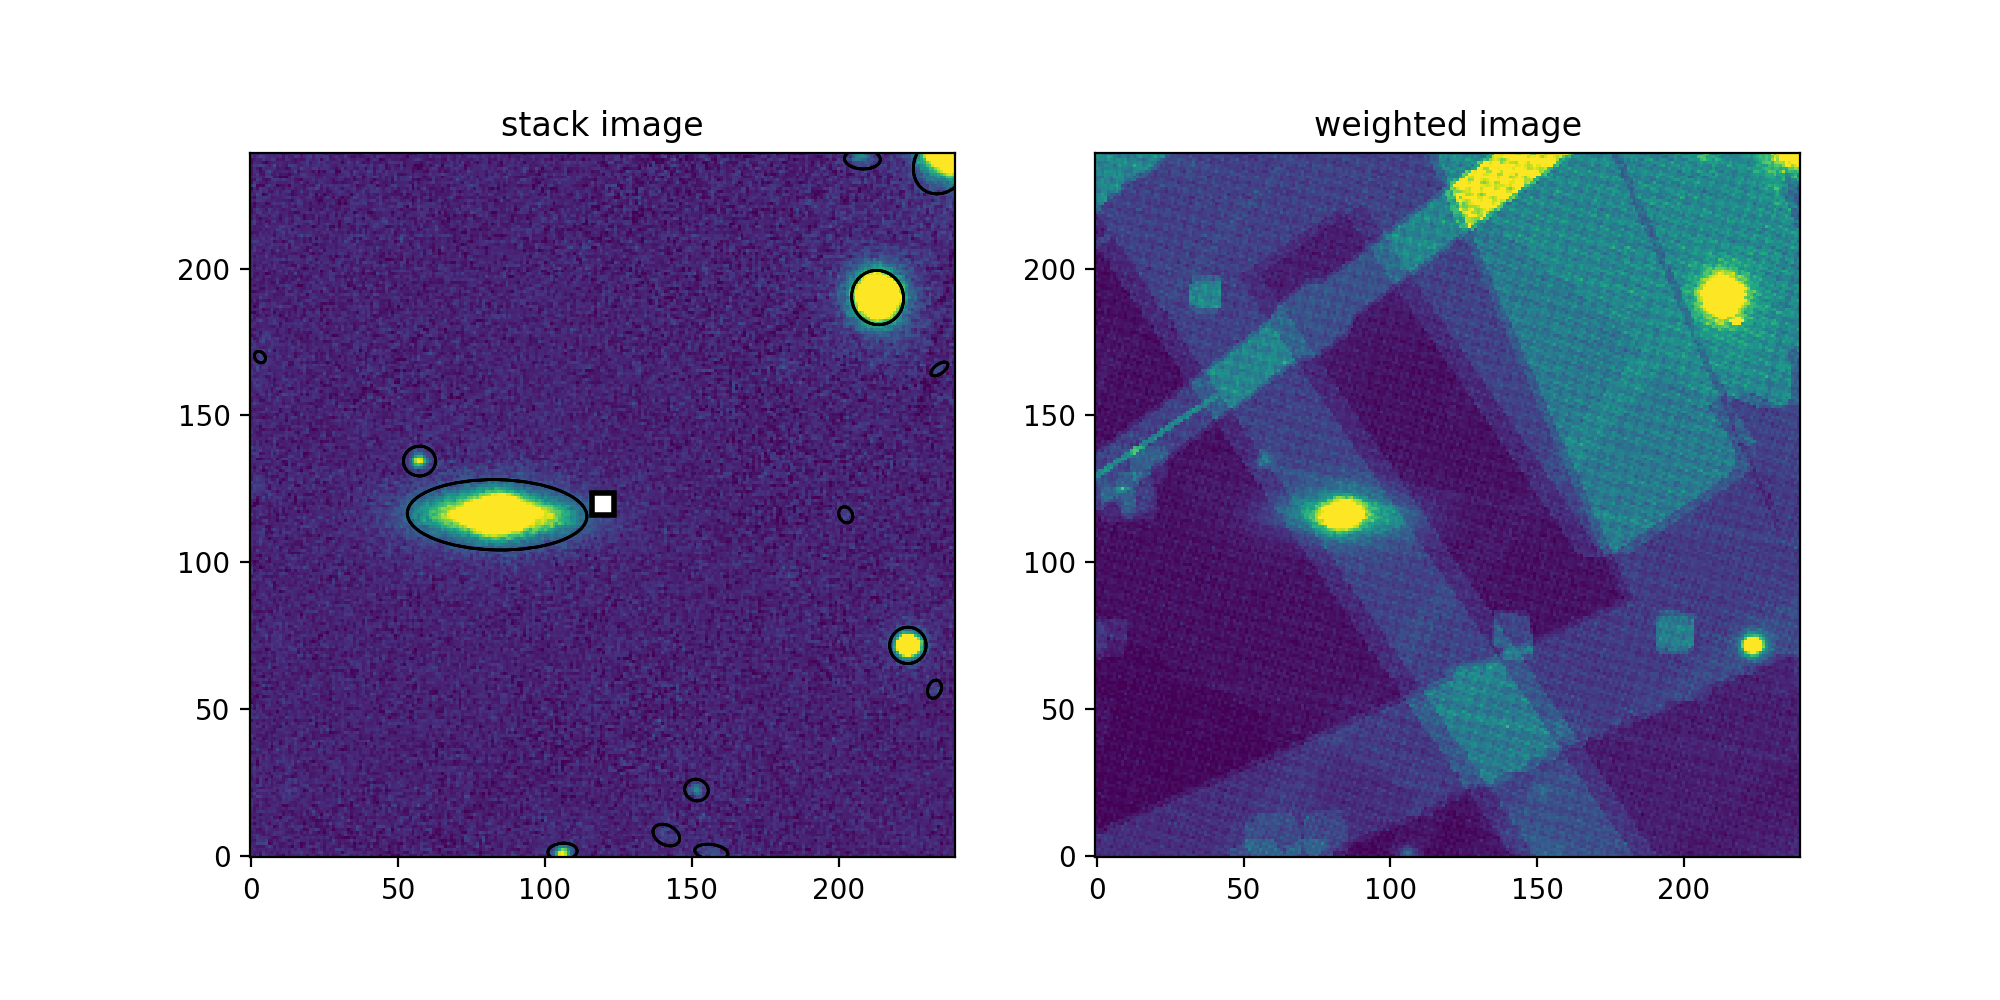

Text(0.5, 1, 'weighted image')

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
rfilter.show(show_sepobjects=True,logscale=False, ax=ax1)
ax1.set_title('stack image')
rfilter.weightimage.show(logscale=False, ax=ax2)
ax2.set_title('weighted image')

## Create Mask Ellipse (and display)

<IPython.core.display.Javascript object>


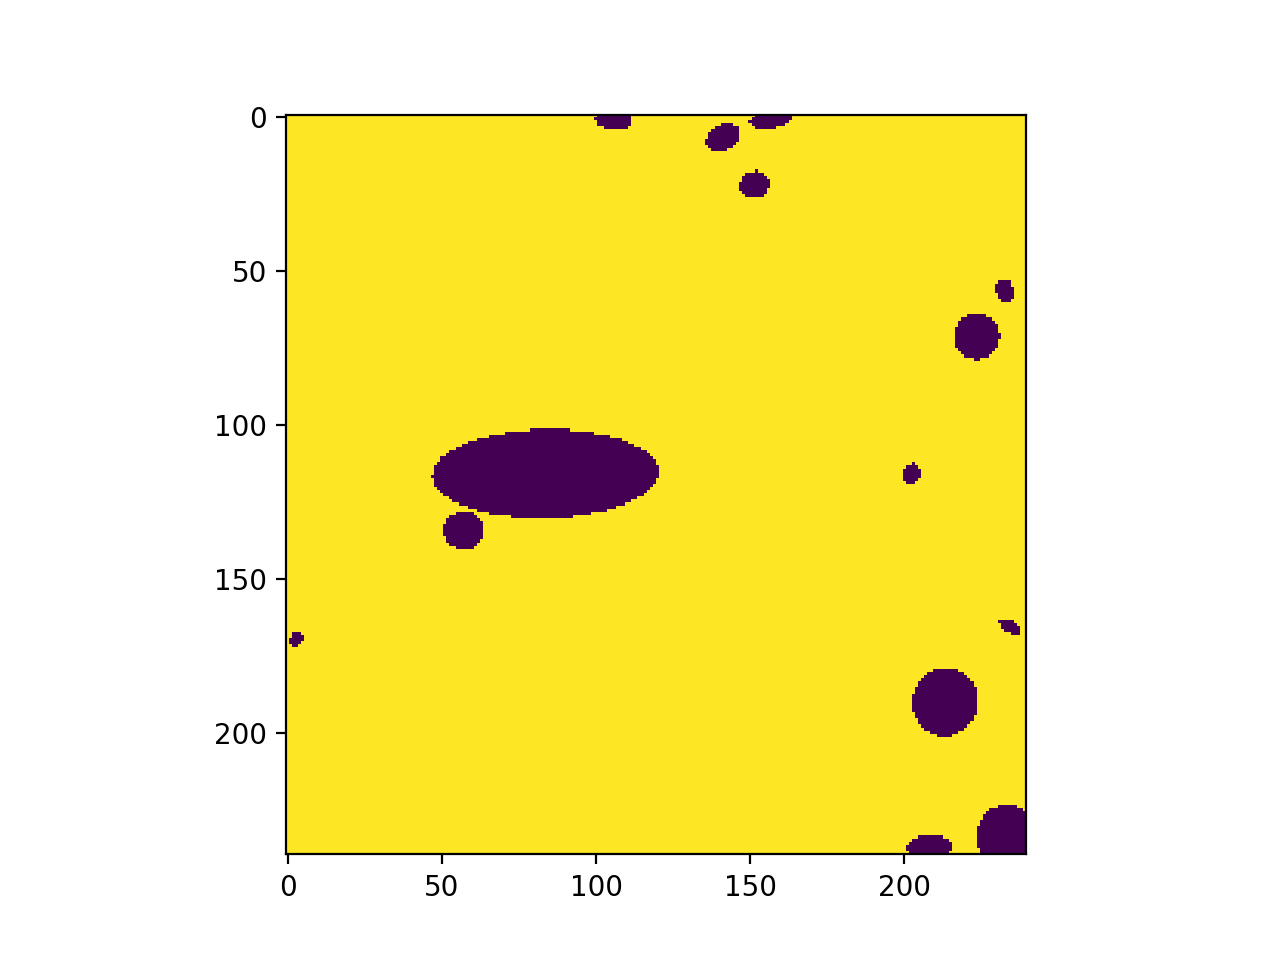

In [121]:
fig,ax=plt.subplots()
ax.imshow(sep.get_ellipse_mask(240,240)*-1)

## 240,240 are width and height of the image

## Distribution of $\frac{flux}{\sqrt{variance}}$ (weighted image = $\frac{1}{\sqrt{variance}}$ ) for the background

<IPython.core.display.Javascript object>


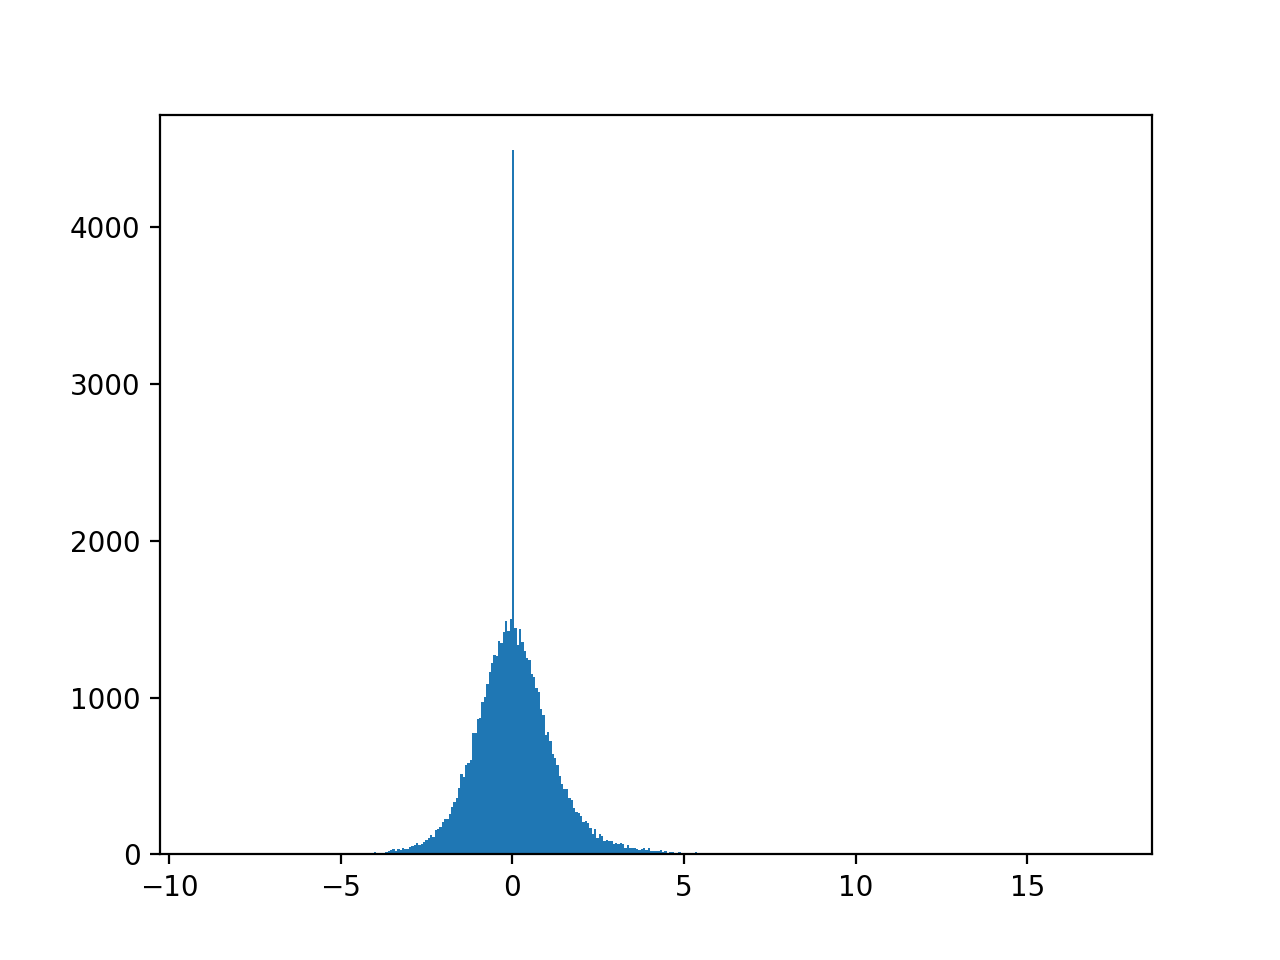

In [122]:
sep_mask= ~sep.get_ellipse_mask(240,240)
fig,ax=plt.subplots()
ax.hist((rfilter.data*sep_mask).ravel()*(rfilter.weightimage.data*sep_mask).ravel(),bins='auto');

### ===> Normal distribution with sigma=1; remember we removed the ellipsed, so this is True for the background. 

## Sep datas

In [8]:
sep=rfilter.sep_extract(returnobjects=True)

In [52]:
sep.data

# 14 ellipse (see figure above)
# flux column referr to the total flux inside the ellipse

id,flux,var,lbda,mjd,bandname,zp,zpsys
str25,float64,float64,float64,float64,str5,object,str2
"156.66793968,1.27564702",9.695808410644531,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"105.96532711,1.41671464",40.72978973388672,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"141.31781714,7.05541163",6.722690582275391,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"151.60294227,22.40625116",16.65838623046875,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"232.67425098,56.75605332",3.541491746902466,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"223.61105282,71.67927785",436.1661682128906,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"83.67413628,116.15519956",3490.62255859375,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"202.42703856,116.15577126",2.5924713611602783,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"57.24220680,134.46618336",55.907081604003906,nan,6214.623038,56041.3157340463,ps1.r,None,ab


### Ellipse parameters : return x, y, a, b, theta for the sep objects

In [99]:
sep.get_ellipse_values()

array([[ 1.56667940e+02,  1.05965327e+02,  1.41317817e+02,
         1.51602942e+02,  2.32674251e+02,  2.23611053e+02,
         8.36741363e+01,  2.02427039e+02,  5.72422068e+01,
         2.34349207e+02,  2.87987070e+00,  2.13295918e+02,
         2.34808057e+02,  2.08127849e+02],
       [ 1.27564702e+00,  1.41671464e+00,  7.05541163e+00,
         2.24062512e+01,  5.67560533e+01,  7.16792778e+01,
         1.16155200e+02,  1.16155771e+02,  1.34466183e+02,
         1.65832517e+02,  1.69885229e+02,  1.90170283e+02,
         2.35547668e+02,  2.37350723e+02],
       [ 2.27890205e+00,  1.99528396e+00,  1.93210196e+00,
         1.62437677e+00,  1.27948260e+00,  2.48752594e+00,
         1.22368746e+01,  1.14289355e+00,  2.19470096e+00,
         1.34210289e+00,  8.45355392e-01,  3.72279811e+00,
         4.18562269e+00,  2.44284487e+00],
       [ 1.03343332e+00,  1.15459406e+00,  1.32342565e+00,
         1.45513546e+00,  9.00950909e-01,  2.47246099e+00,
         4.79019451e+00,  9.02012408e-01,  2.

## 2 ways of displaying ellipses 

<IPython.core.display.Javascript object>


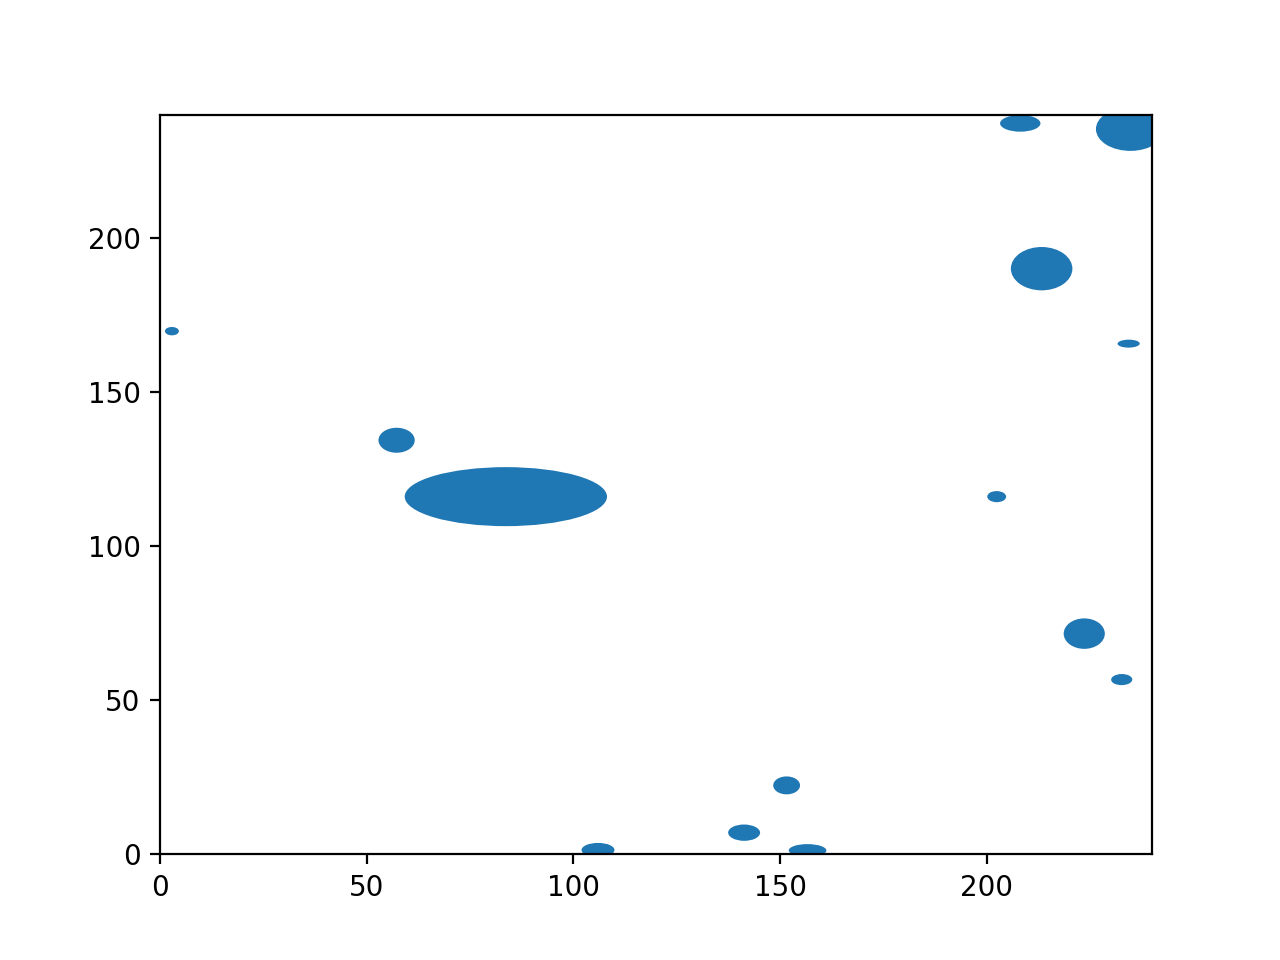

In [123]:
ellipses=sep.get_ellipse_values().T

from matplotlib.patches import Ellipse
fig,ax=plt.subplots()
ells = [Ellipse(xy=[ellipses[i,0],ellipses[i,1]],
                width=ellipses[i,2]*4, height=ellipses[i,3]*4,
                angle=ellipses[i,4])
        for i in range(len(ellipses))]
for e in ells:
    ax.add_artist(e)
ax.set_xlim(0, 240)
ax.set_ylim(0, 240);

<IPython.core.display.Javascript object>


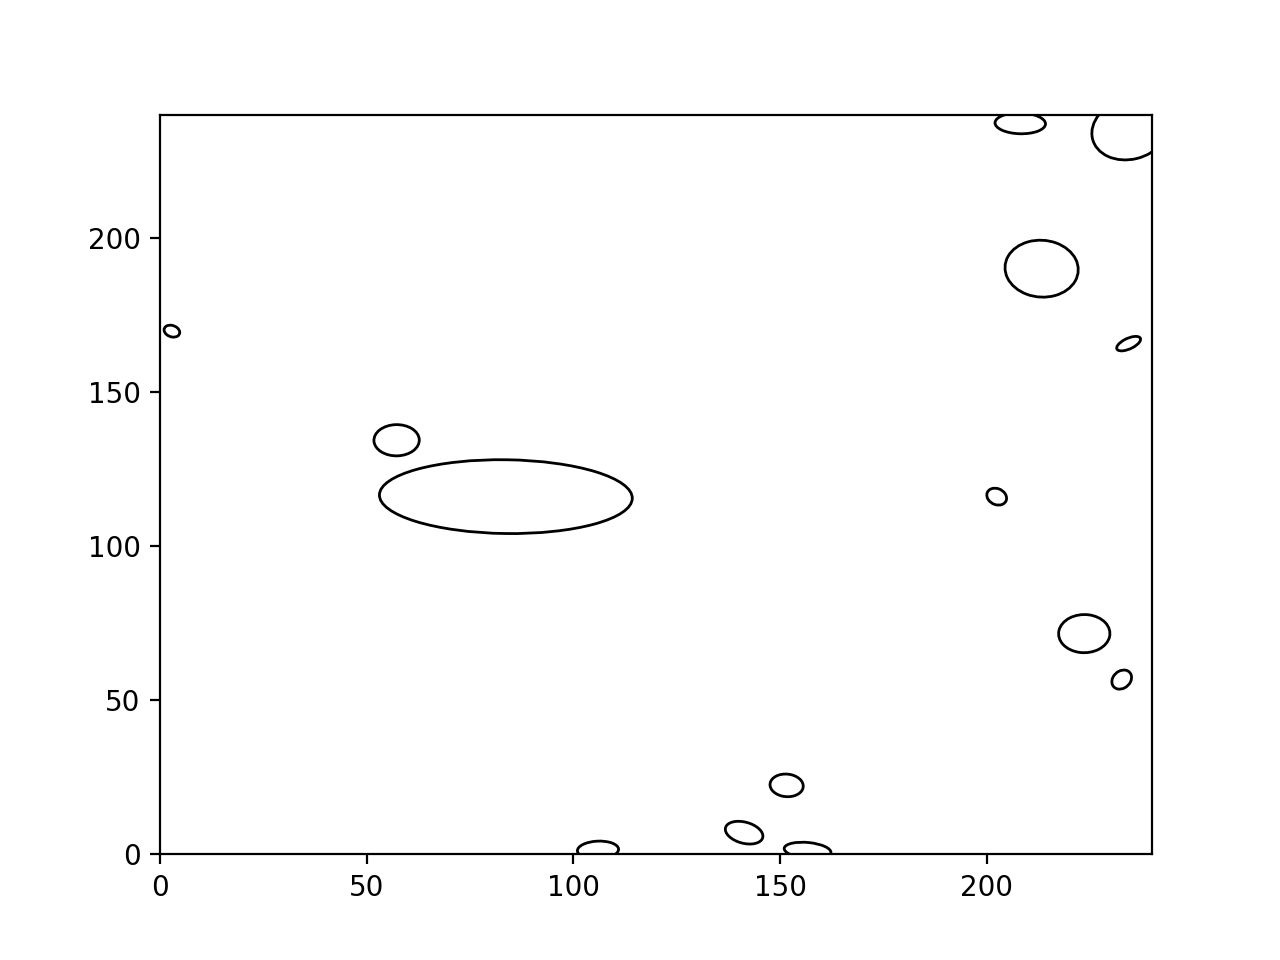

In [124]:
fig,ax=plt.subplots()
sep.display_ellipses(ax=ax)
ax.set_xlim(0, 240)
ax.set_ylim(0, 240);

## Coordinates (ra dec) of the object to which the sep belong

In [60]:
sep.get_skycoords()

<SkyCoord (ICRS): (ra, dec) in deg
    [(11.17524115, 46.73872903), (11.18039345, 46.73877188),
     (11.17687944, 46.73917375), (11.17579967, 46.74022673),
     (11.16748385, 46.74259392), (11.16844807, 46.74366815),
     (11.18262744, 46.74674891), (11.1706316 , 46.74670654),
     (11.18533326, 46.74801105), (11.16738753, 46.75016466),
     (11.19082121, 46.75052813), (11.16951591, 46.751879  ),
     (11.16710334, 46.75515371), (11.17002626, 46.75521837)]>